## Data pereparation:

In [46]:
import torch
import torchvision
from torchvision import transforms, datasets #dataset within Pytorch
                                            #transforms is what we will apply to the data
import torch.utils.data as tud

import matplotlib.pyplot as plt


In [39]:
train = datasets.MNIST("", train=True, download=True,   #first spot specifies where we want the data to go "" means we want it to go locally
                      transform = transforms.Compose([transforms.ToTensor()]))  #here we use the 
#transform to tensor because the MNIST data isn't in tensor format

test = datasets.MNIST("", train=False, download=True,
                     transform = transforms.Compose([transforms.ToTensor()]))

In [41]:
trainset = tud.DataLoader(train, batch_size=10, shuffle=True)
testset = tud.DataLoader(test, batch_size=10, shuffle=True)

In [60]:
#iterating over one batch of ten samples using break to stop at the first batch
#labels at "tensor"

for data in trainset:
    print(data)
    break
    

    
   
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [67]:
x, y = data[0][0], data[1][0]   #data[0th tensor of tensors, 0th element of that tensor] 
                                #so data[0][something] refers to the images and data[1][something]
                                #refers to the labels

#print(data[0][0])     
print(data[0][1].shape)


torch.Size([1, 28, 28])


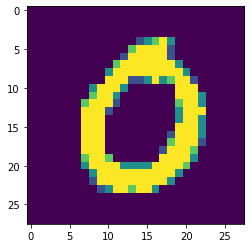

In [68]:
#to plot the image with plt.imshow we need to get rid of the third grey scale dimention, 
#i.e. reshaping with view

plt.imshow(data[0][0].view(28,28))

## Balancing the data:

Motiation: is that the presece of a prominent feature will force the model to overfit to that
dominant feature

In [75]:
#checking the samples for each label

tot = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    samples, labels = data 
    for i in labels:
        counter[int(i)]+= 1
        tot+=1
        
print(counter)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [89]:
for i in counter:  #looping through the elements in counter   
    print(f"{i}: {counter[i]/tot*100}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


data is balanced

## Building the NN

In [ ]:
import torch.nn as nn  #the OOP (initializing parameters)
import torch.nn.functional as F #funtions, passing parameters

